# Prova de Probabilidade - Questão de Simulação TCL

##Alunos:


*   Caio Santana Trigueiro - Matrícula: 2022043310
*   Samira Araújo Malaquias Souza - Matrícula: 2022107580



## Metodologia:


> Utilizamos as bibliotecas pytorch, matplotlib, numpy e scipy.stats da linguagem Python para: gerar as amostras e plotar os histogramas necessários, realizar manipulação de números e lidar com normas estatísticas.

> O código para cada etapa está presente abaixo e comentado para melhor entendimento.

>Escolhemos implementar em um ambiente Jupyter (iPython/ Python interativo) pela facilidade de execução em um navegador sem a necessidade de baixar compiladores ou gerar executáveis além de possuir um sistema de documentação integrada sem necessidade de ferramentas adicionais como arquivos .doc ou .pdf.




## Instruções para Execução:

### **OBS:** O Notebook no Google Colab será compartilhado já executado, com resultados de histogramas e gráficos já gerados por nós anteriormente com valores arbitrários que serão descritos, mas caso esses resultados não apareçam, ou queira rodar novamente, ou então deseje mudar o valor de alguma variável seguem as instruções de execução:

> Dentro do Google Colab, vá até aba **"Ambiente de Execução"** na barra de navegação e selecione a opção **"Executar Tudo"**, ou rode as células de código uma a uma, na ordem em que aparecem.

> **OBS: Caso escolha mudar algum parâmetro posteriormente (as instruções para mudanças serão informadas ao longo do código) repita o passo acima para a geração de novos resultados.**



In [ ]:
# Importando as bibliotecas que usaremos posteriormente.
import torch
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Distribuições Manipuladas:


1. Distribuição de Binomial
> Com probabilidades de sucesso p < 0, 1 e p = 0, 5.

2. Distribuição Exponencial
> Com um parâmetro λ a ser escolhido.

3. Distribuição Uniforme
> Com parâmetros (a,b) a serem escolhidos.

## Parâmetros e Variáveis Modificáveis:

> Os parâmetros utilizados por padrão nas distribuições foram:

* p = 0.05 para a probabilidade de sucesso em caso de p < 0.1 na Binomial.
* λ = 1.0 para a distribuição Exponencial.
* (a,b) = (0.0, 1.0) na distribuição Uniforme

> Os valores m (quantidade de amostras) e n (tamanho por amostra) utilizados por padrão nas distribuições foram:

* m = 100
* n = 100

### Para modificar os 5 valores usados por padrão das variáveis descritas basta modificar célula de código abaixo da maneira descrita nos comentários **(lembre-se de executar novamente para gerar novos resultados após a mudança de parâmetros).**

In [ ]:
p_binomial = 0.05 # Modifique este valor para mudar a probabilidade de Sucesso "p" para a Distribuição Binomial.

lambda_exp = 1.0 # Modifique este valor para mudar o valor de "λ" na Distribuição Exponencial.

a_lower_bound_uniform = 0.0 # Modifique este valor para mudar o limite inferior "a" da Distribuição Uniforme.

b_upper_bound_uniform = 1.0 # Modifique este valor para mudar o limite superior "b" da Distribuição Uniforme.

n = 100 # Modifique este valor para mudar a quantidade de amostras "m" por distribuição.

m = 100 # Modifique este valor para mudar o tamanho das amostras "n".

A partir daqui não há necessidade de modificar nenhuma célula de código.

## (a) Gerando "m" amostras de tamanho "n": X1, X2, . . . , Xn.




In [ ]:

# Função para gerar amostras para uma distribuição específica
def generate_samples(distribution, n, m, params):
    samples = []
    for _ in range(m):
        if distribution == 'binomial':
            samples.append(torch.distributions.Binomial(**params).sample((n,)))
        elif distribution == 'exponential':
            samples.append(torch.distributions.Exponential(**params).sample((n,)))
        elif distribution == 'uniform':
            samples.append(torch.distributions.Uniform(**params).sample((n,)))
    return samples

# Função para calcular médias amostrais
def calculate_sample_means(samples):
    return [torch.mean(sample) for sample in samples]

# Função para gerar histogramas
def plot_histogram(samples, title):
    plt.figure(figsize=(10, 6))
    for sample in samples:
        plt.hist(sample, bins=30, alpha=0.5)
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

# Parâmetros de exemplo para cada distribuição
params_binomial_p_less_than_01 = {'total_count': 10, 'probs': p_binomial}
params_binomial = {'total_count': 10, 'probs': 0.5}
params_exponential = {'rate': lambda_exp}
params_uniform = {'low': a_lower_bound_uniform, 'high': b_upper_bound_uniform}

# Geração de amostras
samples_binomial_p_less_than_01 = generate_samples('binomial', n, m, params_binomial_p_less_than_01)
samples_binomial = generate_samples('binomial', n, m, params_binomial)
samples_exponential = generate_samples('exponential', n, m, params_exponential)
samples_uniform = generate_samples('uniform', n, m, params_uniform)


 ## (b) Comandos para gerar os histogramas (gráficos) das amostras da distribuicão.

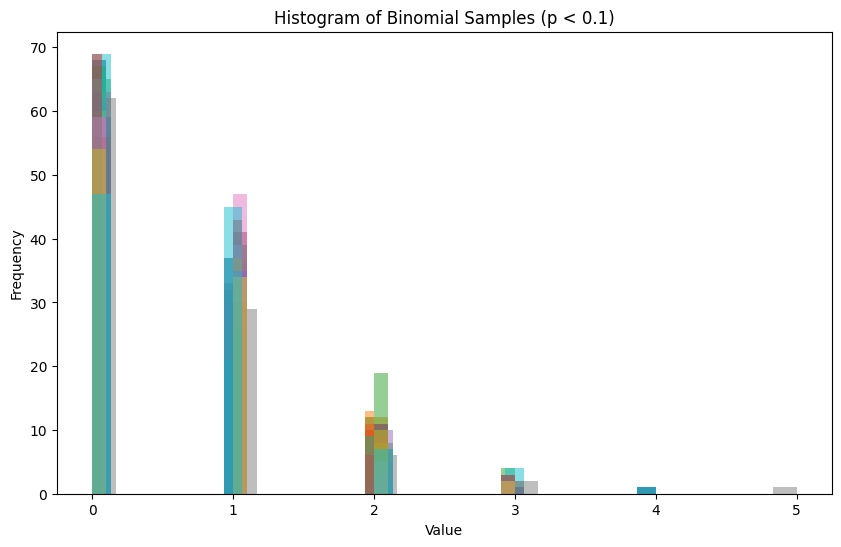

In [ ]:
# Gerar e exibir histogramas
plot_histogram(samples_binomial_p_less_than_01, "Histogram of Binomial Samples (p < 0.1)")

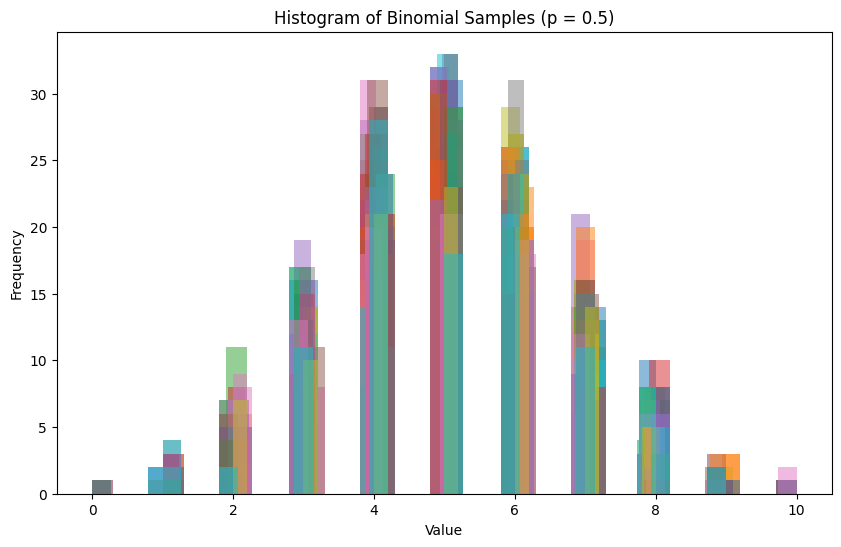

In [ ]:
plot_histogram(samples_binomial, "Histogram of Binomial Samples (p = 0.5)")

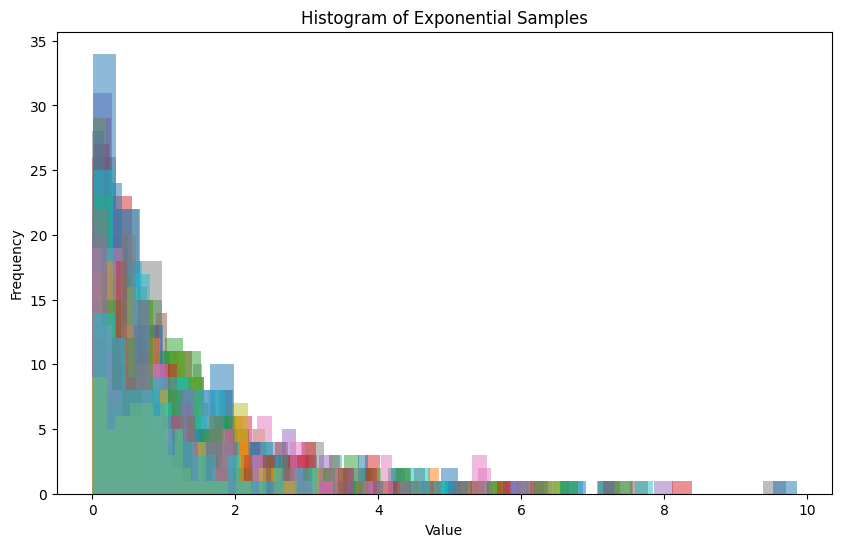

In [ ]:
plot_histogram(samples_exponential, "Histogram of Exponential Samples")

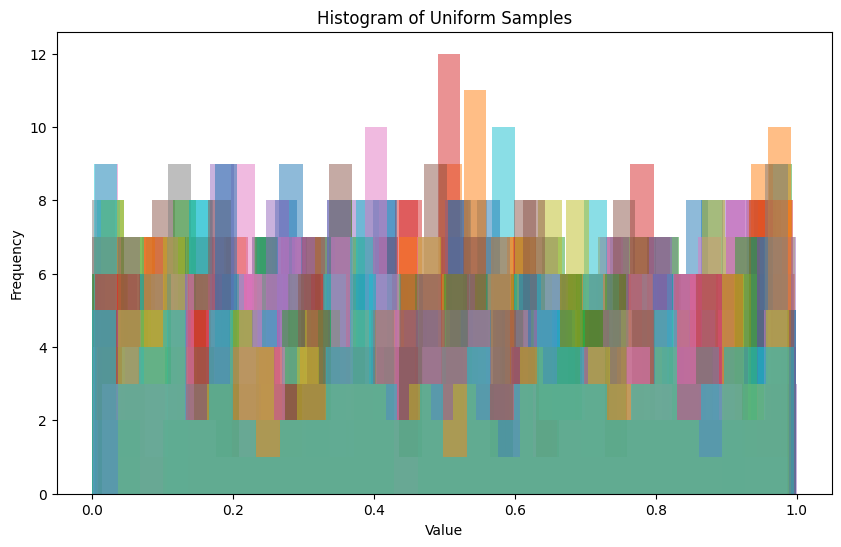

In [ ]:
plot_histogram(samples_uniform, "Histogram of Uniform Samples")

## (c) Calculando a média amostral de cada uma das "m" amostras de tamanho "n"   geradas.

In [ ]:
# Cálculo de médias amostrais
means_binomial_p_less_than_01 = calculate_sample_means(samples_binomial_p_less_than_01)
means_binomial = calculate_sample_means(samples_binomial)
means_exponential = calculate_sample_means(samples_exponential)
means_uniform = calculate_sample_means(samples_uniform)

# Exibindo médias amostrais
print("Médias amostrais das distribuições:")
print("Binomial (p < 0.1):", means_binomial_p_less_than_01)
print("Binomial:", means_binomial)
print("Exponencial:", means_exponential)
print("Uniforme:", means_uniform)

Médias amostrais das distribuições:
Binomial (p < 0.1): [tensor(0.5500), tensor(0.4300), tensor(0.5000), tensor(0.4600), tensor(0.5300), tensor(0.4900), tensor(0.4600), tensor(0.5200), tensor(0.4600), tensor(0.3800), tensor(0.4300), tensor(0.4900), tensor(0.4800), tensor(0.4700), tensor(0.5600), tensor(0.5400), tensor(0.5300), tensor(0.4900), tensor(0.4800), tensor(0.5400), tensor(0.4500), tensor(0.4200), tensor(0.5300), tensor(0.4500), tensor(0.4200), tensor(0.5700), tensor(0.6200), tensor(0.4700), tensor(0.5300), tensor(0.4300), tensor(0.4800), tensor(0.5200), tensor(0.4800), tensor(0.5500), tensor(0.5500), tensor(0.4700), tensor(0.4000), tensor(0.4200), tensor(0.4300), tensor(0.5200), tensor(0.3800), tensor(0.6000), tensor(0.6000), tensor(0.4100), tensor(0.5000), tensor(0.4800), tensor(0.4700), tensor(0.5300), tensor(0.5000), tensor(0.4700), tensor(0.4000), tensor(0.4400), tensor(0.4200), tensor(0.4800), tensor(0.4600), tensor(0.4800), tensor(0.5300), tensor(0.5200), tensor(0.4500),

## (d) Comandos para gerar o histograma das "m" médias amostrais encontradas.
> Comparando com o gráfico da distribuição Normal com média e o desvio-padrão da distribuição usada para gerar a amostra.

In [ ]:
# Função para plotar o histograma das médias amostrais e comparar com a distribuição Normal
def plot_means_histogram_with_normal_comparison(means, distribution_params, title):
    # Calcula a média e o desvio padrão das médias amostrais
    sample_mean = torch.mean(torch.tensor(means))
    sample_std = torch.std(torch.tensor(means), unbiased=True)

    # Plot o histograma das médias amostrais
    plt.figure(figsize=(10, 6))
    plt.hist(means, bins=30, alpha=0.5, label='Médias Amostrais')

    # Gera pontos para a curva da distribuição normal
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, sample_mean, sample_std)

    # Plot a curva da distribuição normal
    plt.plot(x, p * len(means) * (xmax - xmin) / 30, 'k', linewidth=2, label='Distribuição Normal')

    # Títulos e labels
    plt.title(title)
    plt.xlabel('Valor da Média Amostral')
    plt.ylabel('Frequência')
    plt.legend()
    plt.show()

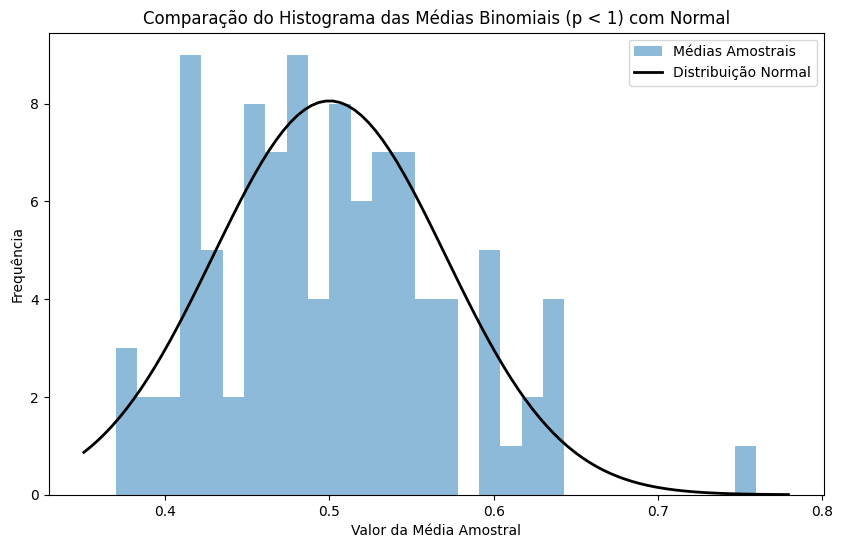

In [ ]:
plot_means_histogram_with_normal_comparison(means_binomial_p_less_than_01, params_binomial_p_less_than_01, "Comparação do Histograma das Médias Binomiais (p < 1) com Normal")

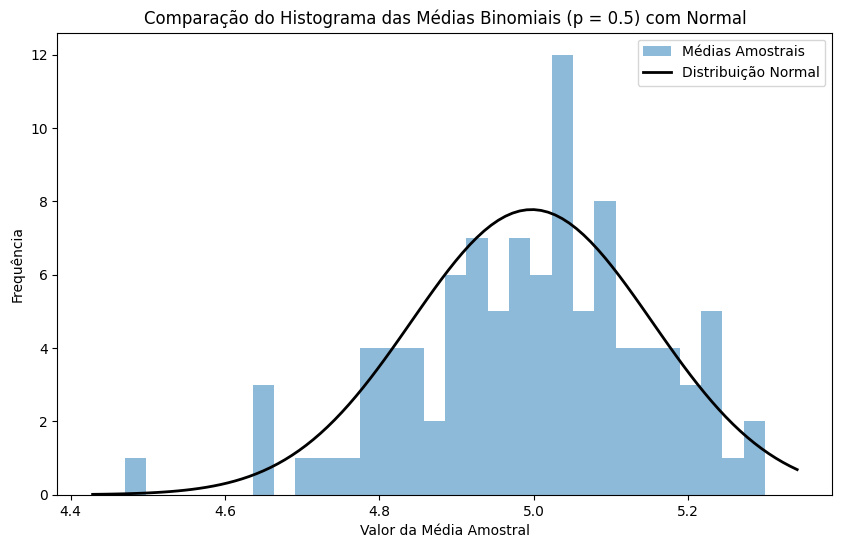

In [ ]:
plot_means_histogram_with_normal_comparison(means_binomial, params_binomial, "Comparação do Histograma das Médias Binomiais (p = 0.5) com Normal")

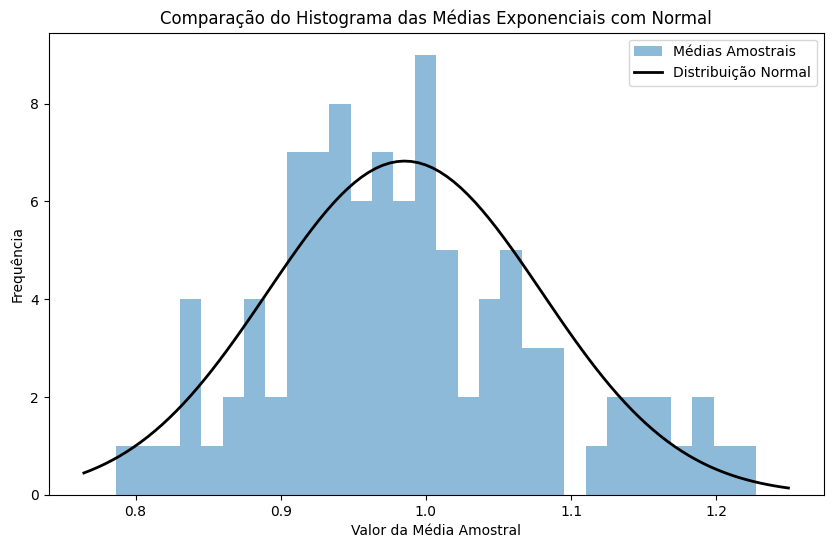

In [ ]:
plot_means_histogram_with_normal_comparison(means_exponential, params_exponential, "Comparação do Histograma das Médias Exponenciais com Normal")

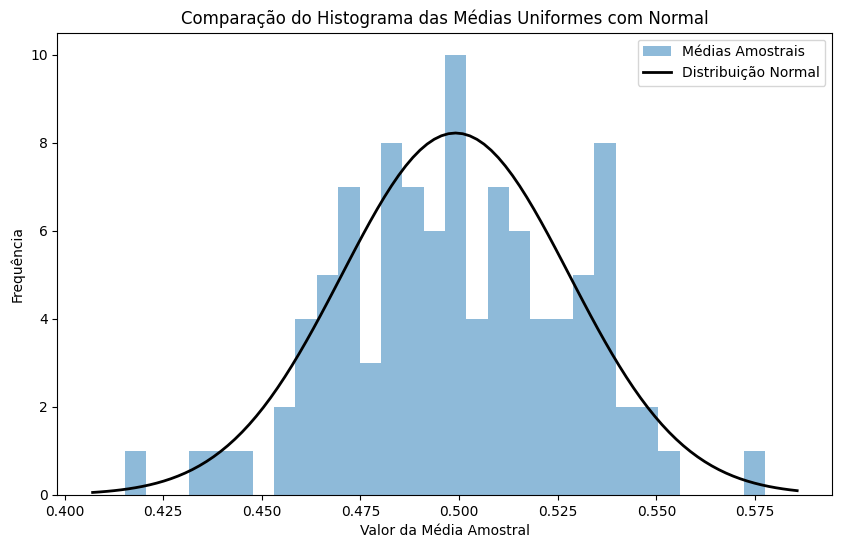

In [ ]:
plot_means_histogram_with_normal_comparison(means_uniform, params_uniform, "Comparação do Histograma das Médias Uniformes com Normal")

## (e) Comentários dos resultados.

### 1. Conformidade dos Histogramas com as Distribuições Esperadas: O fato de os histogramas de cada distribuição estarem conforme o esperado indica que a geração de amostras foi bem-sucedida e representa adequadamente as características estatísticas das respectivas distribuições. Isto é fundamental para a validade dos testes subsequentes e para a compreensão do TCL.

### 2. Teorema Central do Limite (TCL): A observação de que, com o aumento dos valores de "m" e "n", os histogramas das médias amostrais tendem a se assemelhar mais a uma distribuição normal é um exemplo clássico do TCL em ação. Isso demonstra que, independentemente da forma da distribuição original das amostras, a distribuição das médias amostrais converge para uma distribuição normal à medida que o tamanho da amostra aumenta. Este é um conceito fundamental em estatística e é crucial para muitas áreas de pesquisa.

### 3. Padronização e Comparação com a Normal(0,1): Ao padronizar as médias (subtraindo a média verdadeira e dividindo pelo desvio padrão verdadeiro da média amostral), e comparar com a distribuição Normal(0,1), você está fornecendo uma visão ainda mais clara de como o TCL funciona. Isso ajuda a ilustrar que, independentemente da escala original das variáveis, a distribuição das médias amostrais normalizadas tende a seguir uma distribuição normal padrão.

### 4. Implicações Práticas e Educativas: Este tipo de análise e simulação é extremamente útil para fins educacionais, pois proporciona uma compreensão visual e prática de conceitos estatísticos chave. Isso é especialmente importante em campos onde os alunos podem não ter um forte background em matemática ou estatística, como nas ciências biológicas ou humanas.

### 5. Em suma, seu trabalho fornece uma excelente demonstração do Teorema Central do Limite e suas implicações, uma ferramenta valiosa para a compreensão estatística em diversas áreas.